In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("CarPrice_Assignment.csv")

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [23]:
df.shape

(205, 26)

<h1> Prediction </h1>

In [92]:
def predict(x, w, b):
    return np.dot(x, w) + b

def compute_cost(x, y, w, b):
    m = len(y)

    fwb = predict(x, w, b)
    cost = (1 / (2 * m)) * np.sum((fwb - y) ** 2)
    
    return cost

In [113]:
def compute_gradient(x, y, w, b):
    m = len(y)

    fwb = predict(x, w, b)
    
    dj_dw = (1 / m) * np.dot(x.T, (fwb - y))
    dj_db = (1 / m) * np.sum(fwb - y)

    return dj_dw, dj_db

def gradient_descent(x, y, w, b, alpha, iterations):
    w = w.copy()

    history_cost = []

    for i in range(iterations):
        dj_dw, dj_db = compute_gradient(x, y, w, b)

        w -= alpha * dj_dw
        b -= alpha * dj_db

        cost = compute_cost(x, y, w, b)
        history_cost.append(cost)

    return w, b, history_cost

<h2>Data prep and training</h2>

In [148]:

features = ["symboling", "wheelbase", "carlength", "carwidth", "carheight", "curbweight", "enginesize", "boreratio", "stroke", "compressionratio", "horsepower", "peakrpm", "citympg", "highwaympg"]

x = df[features].values
y = df["price"].values.reshape(-1, 1)

# splitting them, one for training and one for testing (only have one dataset so i gotta do this)
# this is for checking whether it underfits or overfits

# 80% for training, 20% for testing
split = int(0.8 * len(x))
x_train, x_test = x[:split], x[split:]
y_train, y_test = y[:split], y[split:]

In [256]:
# adding squared or cubed or more values

degree = 2

x_train_poly = np.hstack([x_train ** i for i in range(1, degree + 1)])
x_test_poly = np.hstack([x_test ** i for i in range(1, degree + 1)])

In [257]:
# normalizing both training and test x (use the mean and std from training data)
mean = np.mean(x_train_poly, axis = 0)
std = np.std(x_train_poly, axis =0)

x_train_poly_norm = (x_train_poly - mean) / std
x_test_poly_norm = (x_test_poly - mean) / std

In [258]:
# training
w = np.zeros((x_train_poly_norm.shape[1], 1))
b = 0
alpha = 0.01
iterations = 1000
w_final, b_final, cost_history = gradient_descent(x_train_poly_norm, y_train, w, b, alpha, iterations)

In [259]:
# print(f"final w: {w_final}")
# print(f"final b: {b_final}")


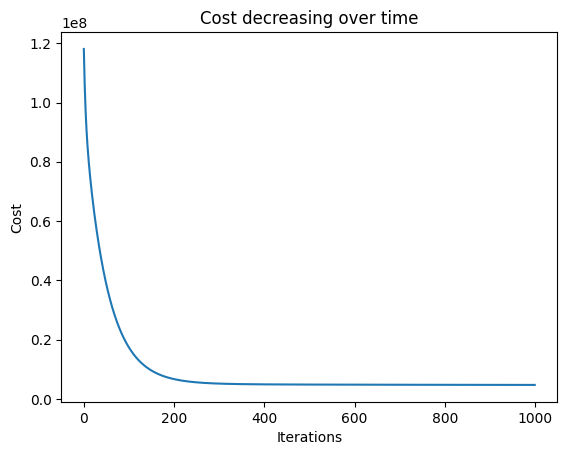

In [260]:
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost decreasing over time")
plt.show()

In [261]:
y_train_pred = predict(x_train_poly_norm, w_final, b_final)
y_test_pred = predict(x_test_poly_norm, w_final, b_final)


Computing MSE (mean squared error)

In [262]:
def mse(y_prediction, y_true):
    m = len(y_true)
    return (1 / m) * np.sum((y_prediction - y_true) ** 2)

In [263]:
train_mse = mse(y_train_pred, y_train)
test_mse = mse(y_test_pred, y_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

# error percentage
mean_train_y = np.mean(y_train)
mean_test_y = np.mean(y_test)

In [264]:
print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)
print("training error percentage: ", ((train_rmse / mean_train_y) * 100))
print("testing error percentage: ", ((test_rmse / mean_test_y) * 100))

Train RMSE: 3062.3420529488017
Test RMSE: 3193.106964302107
training error percentage:  22.924686445042028
testing error percentage:  24.656314311454413


damn i learned quite alot here about overfitting and underfitting

im too lazy to actually create a sample prediction so it ends here